In [22]:
import os
import pandas as pd

In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%d-%m-%Y %H:%M', errors='coerce')


In [37]:
import os
import pandas as pd

# Specify the absolute path without the dot
path = r"C:\Users\Dell\Downloads\Python Project\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

files = [file for file in os.listdir(path) if not file.startswith('.')]  # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(os.path.join(path, file))
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)


In [44]:
import pandas as pd

# Read the "all_data_copy.csv" file
all_data = pd.read_csv("all_data_copy.csv")

# Display the first few rows
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [113]:
import pandas as pd

# Read the original CSV file
original_data = pd.read_csv("all_data_copy.csv")

# Display the original DataFrame
print(original_data.head(5))


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [64]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [65]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [55]:
all_data = all_data.dropna(subset=['Order Date'])


In [67]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [68]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [112]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


Question 1: What was the best month for sales? How much was earned that month?

In [76]:
# Group the data by the 'Month' column and calculate the sum of 'Sales' for each month
monthly_sales = all_data.groupby('Month')['Sales'].sum()

# Find the month with the highest sales
best_month = monthly_sales.idxmax()

# Get the total earnings for the best month
best_month_earnings = monthly_sales.max()

# Display the results
print(f"The best month for sales was Month {best_month} with total earnings of ${best_month_earnings:.2f}")


The best month for sales was Month 12 with total earnings of $4613443.34


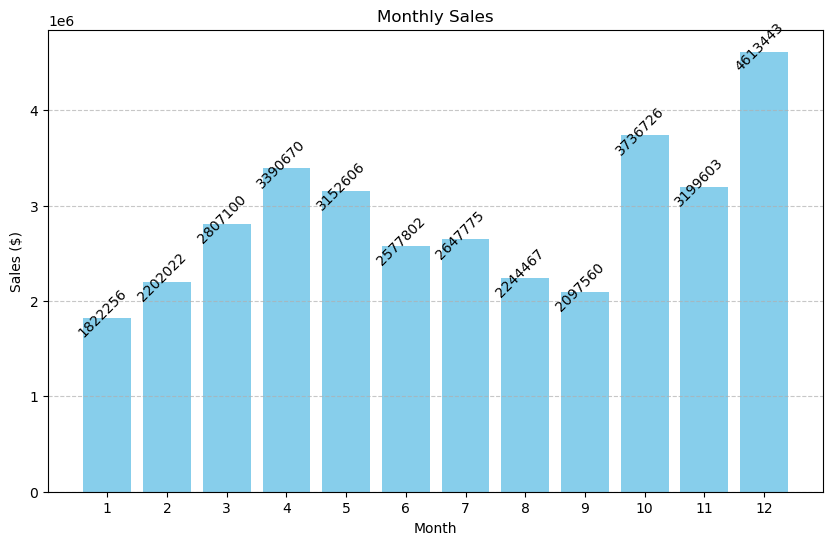

In [84]:
import matplotlib.pyplot as plt

# Group the data by the 'Month' column and calculate the sum of 'Sales' for each month
monthly_sales = all_data.groupby('Month')['Sales'].sum()

# Plotting the bar chart with data labels at a 45-degree angle
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales.index, monthly_sales, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales')
plt.xticks(monthly_sales.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to each bar at a 45-degree angle without decimals
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval),
             ha='center', va='bottom', rotation=45, rotation_mode='anchor')

# Show the plot
plt.show()


Question 2: What city and state had the highest sales?

In [105]:
all_data = pd.DataFrame(all_data)

# Define a lambda function to extract city and state
get_city_state = lambda address: pd.Series({'City': address.split(',')[1].strip(), 'State': address.split(',')[2].split()[0]})

# Apply the lambda function to 'Purchase Address' column
all_data[['City', 'State']] = all_data['Purchase Address'].apply(get_city_state)

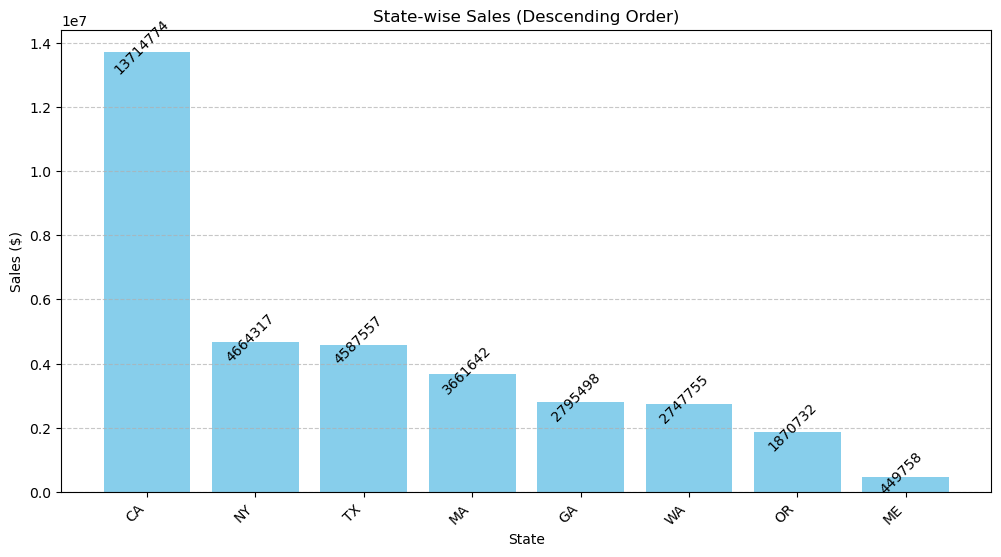

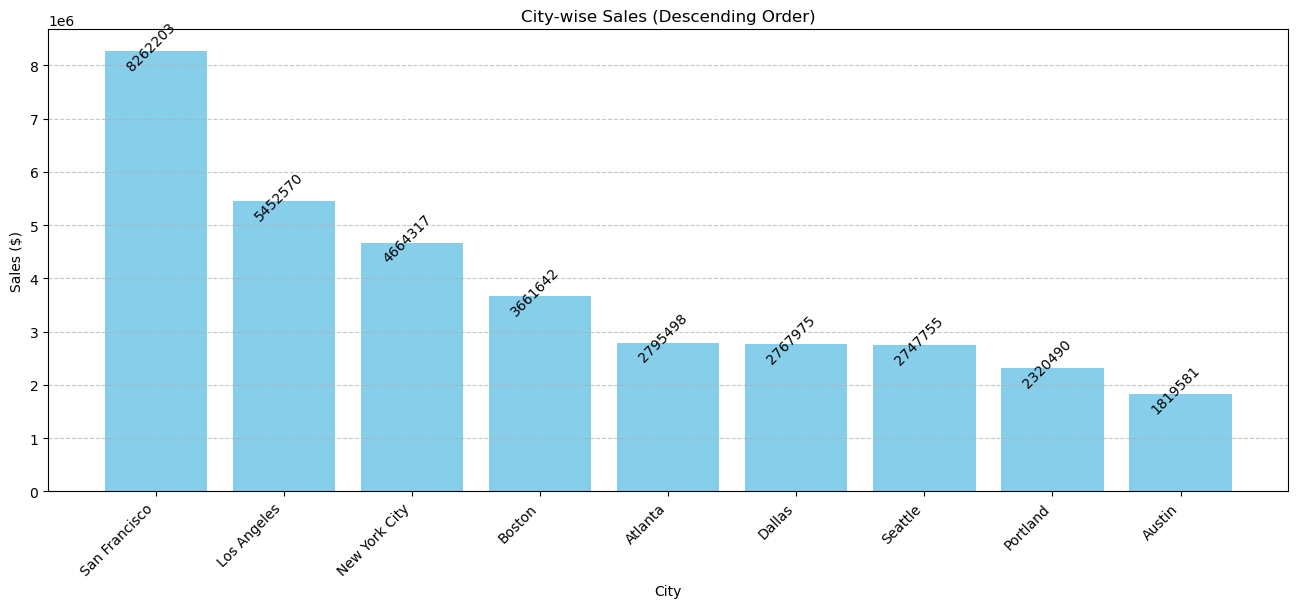

In [116]:
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame

# Group the data by the 'State' column and calculate the sum of 'Sales' for each state
state_sales = all_data.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotting the bar chart for state-wise sales
plt.figure(figsize=(12, 6))
bars_state = plt.bar(state_sales.index, state_sales, color='skyblue')
plt.xlabel('State')
plt.ylabel('Sales ($)')
plt.title('State-wise Sales (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to each bar for state-wise sales
for bar in bars_state:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval),
             ha='center', va='bottom', rotation=45, rotation_mode='anchor')

# Show the state-wise sales plot
plt.show()

# Aggregate city-wise sales and sort before plotting
city_sales = all_data.groupby('City')['Sales'].sum().reset_index()
city_sales = city_sales.sort_values(by='Sales', ascending=False)

# Plotting the bar chart for city-wise sales
plt.figure(figsize=(16, 6))
bars_city = plt.bar(city_sales['City'], city_sales['Sales'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.title('City-wise Sales (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to each bar for city-wise sales
for bar in bars_city:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval),
             ha='center', va='bottom', rotation=45, rotation_mode='anchor')

# Show the city-wise sales plot
plt.show()



Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [121]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m-%d-%Y %H:%M')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [127]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


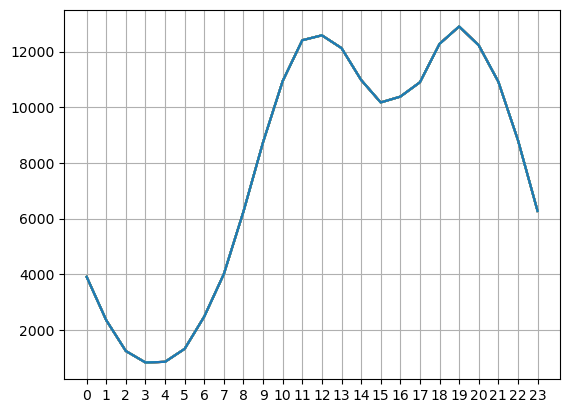

In [143]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

Question 4: What products are most often sold together?

In [181]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9628\3162199046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [190]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

all_data.head()

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


What product sold the most? Why do you think it sold the most?

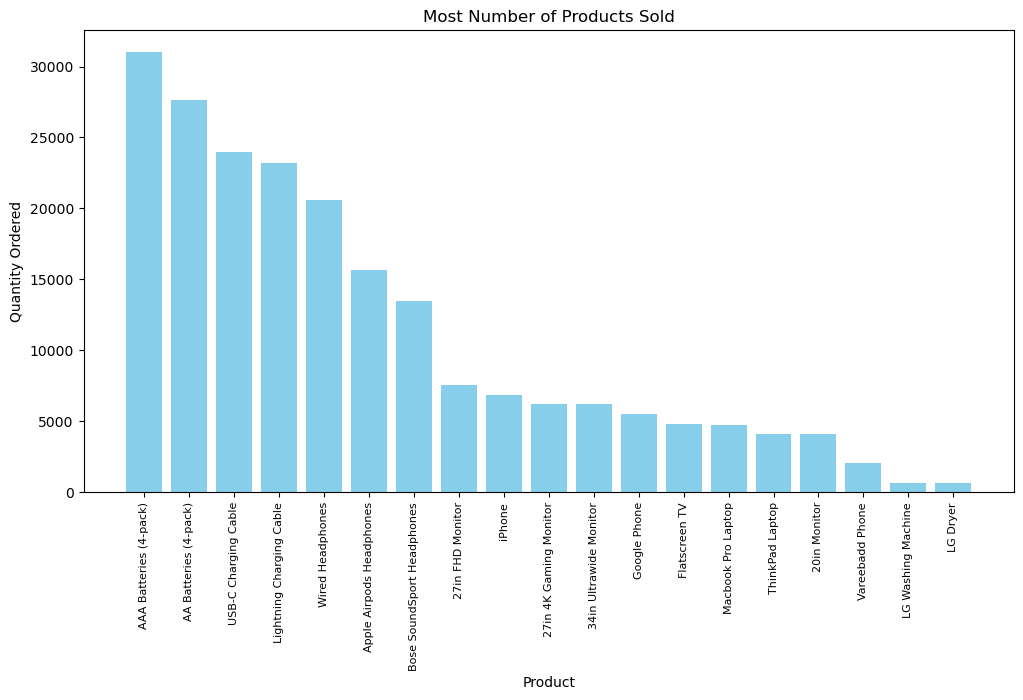

In [195]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
# Group by product and sum the quantity ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum().reset_index()

# Sort the products based on the quantity sold
quantity_ordered = quantity_ordered.sort_values(by='Quantity Ordered', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(quantity_ordered['Product'], quantity_ordered['Quantity Ordered'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical', size=8)
plt.title('Most Number of Products Sold')
plt.show()

In [198]:
# Assuming 'Price Each' is a numeric column
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Group by product and calculate the average price
product_prices = all_data.groupby('Product')['Price Each'].mean().reset_index()

# Display the result
print(product_prices)


                       Product  Price Each
0                 20in Monitor      109.99
1       27in 4K Gaming Monitor      389.99
2             27in FHD Monitor      149.99
3       34in Ultrawide Monitor      379.99
4        AA Batteries (4-pack)        3.84
5       AAA Batteries (4-pack)        2.99
6     Apple Airpods Headphones      150.00
7   Bose SoundSport Headphones       99.99
8                Flatscreen TV      300.00
9                 Google Phone      600.00
10                    LG Dryer      600.00
11          LG Washing Machine      600.00
12    Lightning Charging Cable       14.95
13          Macbook Pro Laptop     1700.00
14             ThinkPad Laptop      999.99
15        USB-C Charging Cable       11.95
16             Vareebadd Phone      400.00
17            Wired Headphones       11.99
18                      iPhone      700.00


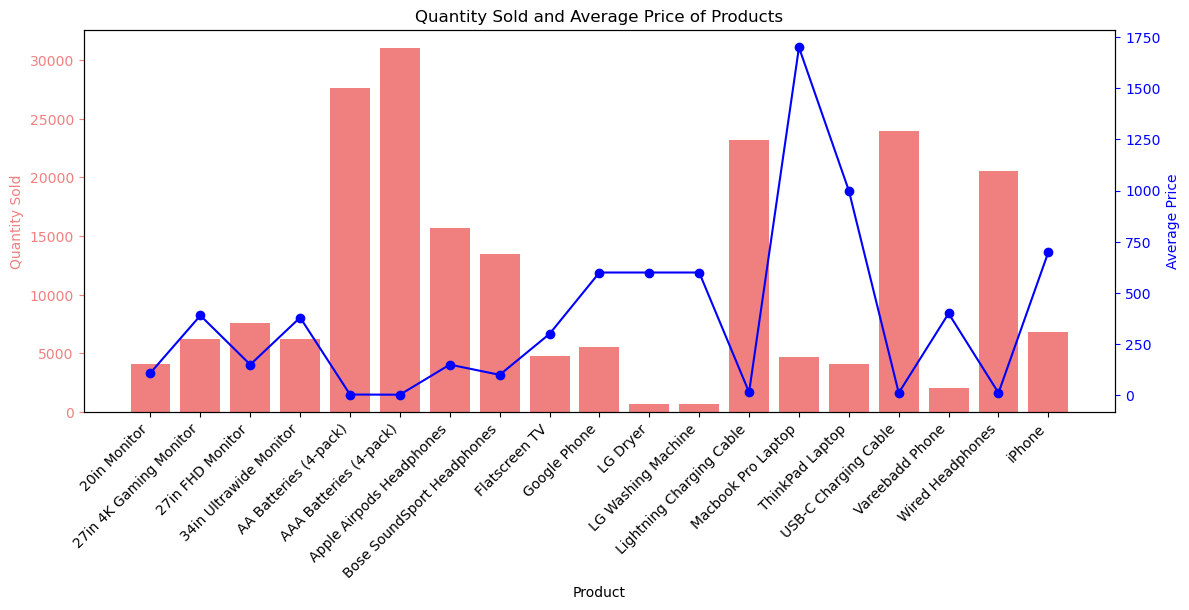

In [200]:
import matplotlib.pyplot as plt

# Assuming 'Price Each' is a numeric column
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Group by product and calculate the sum of quantity ordered
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Group by product and calculate the average price
product_prices = all_data.groupby('Product')['Price Each'].mean().reset_index()

# Plotting the bar chart for quantity sold
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for quantity sold
ax1.bar(product_quantity['Product'], product_quantity['Quantity Ordered'], color='lightcoral', label='Quantity Sold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='lightcoral')
ax1.tick_params('y', colors='lightcoral')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Create a second y-axis to overlay the line chart for prices
ax2 = ax1.twinx()
ax2.plot(product_prices['Product'], product_prices['Price Each'], color='blue', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='blue')
ax2.tick_params('y', colors='blue')

# Add legends and title
fig.tight_layout()
plt.title('Quantity Sold and Average Price of Products')

# Show the plot
plt.show()


In [202]:
# Assuming your DataFrame is named 'all_data'
file_path = r'C:\Users\Dell\Downloads\Python Project\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\your_file_name.csv'
all_data.to_csv(file_path, index=False)

